# Red Wine Quality 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
winedf = pd.read_csv('winequality-red.csv')

In [3]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
winedf.shape

(1599, 12)

In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
winedf.isnull().sum().sum()

0

# EDA

Text(0, 0.5, 'count')

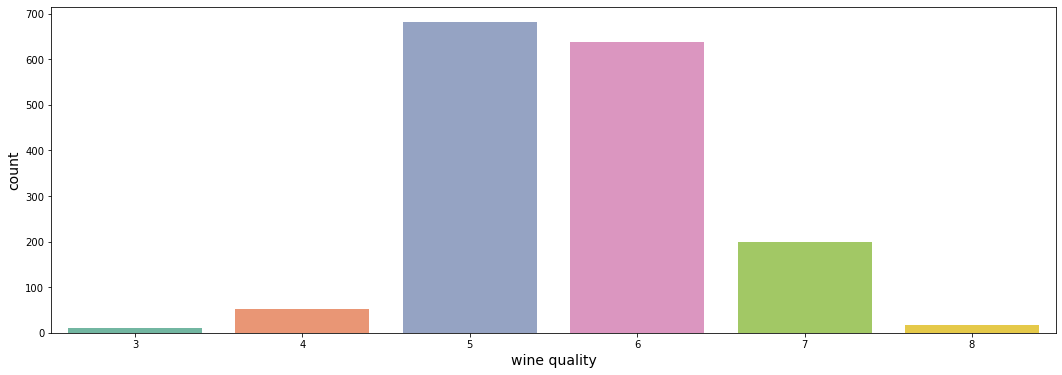

In [11]:
plt.figure(figsize=(18,6))
ax1 = sns.countplot(x='quality',data=winedf,palette = 'Set2')
plt.xlabel('wine quality',fontsize=14)
plt.ylabel('count',fontsize=14)

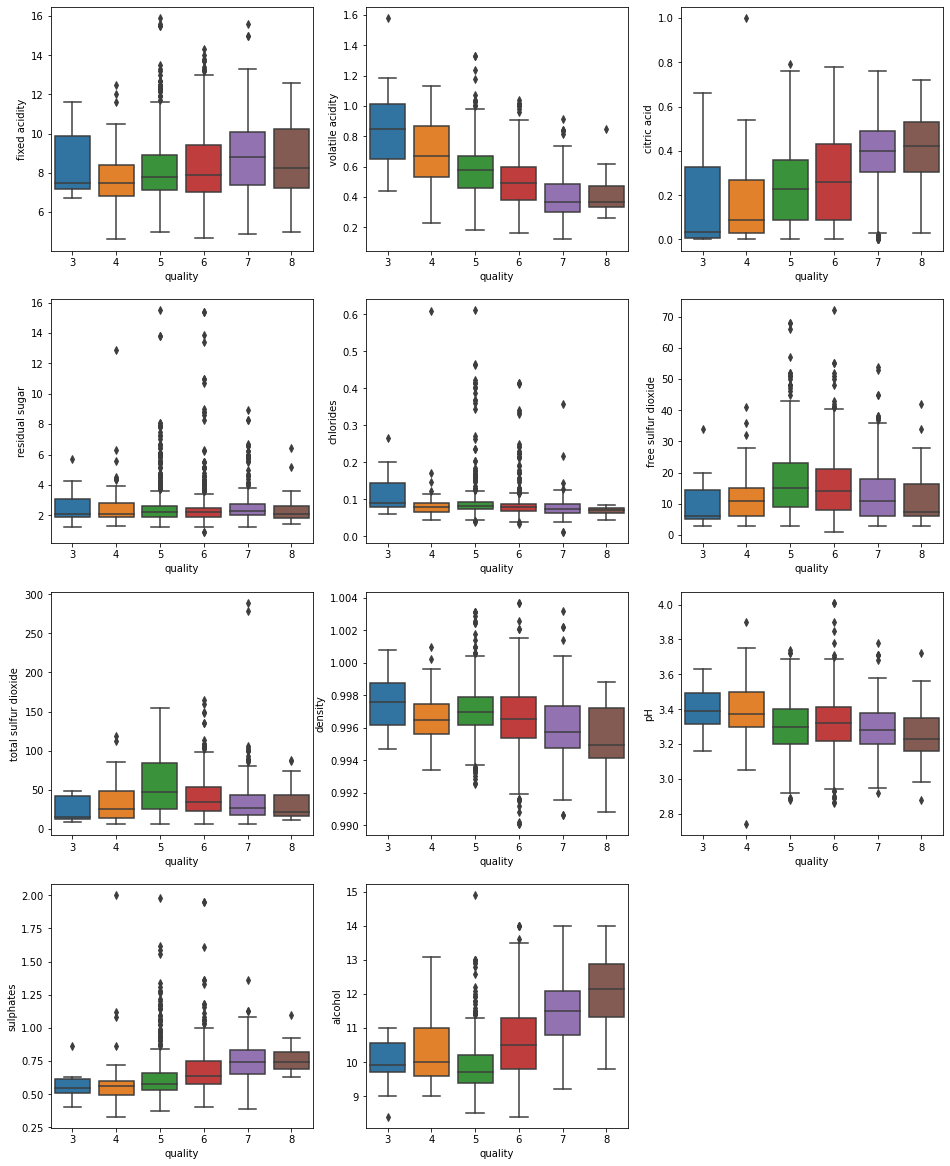

In [20]:
features_ = winedf.columns.values[:-1]
fig = plt.figure(figsize=(16,26))
for column , feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data =winedf, x='quality',y=feature)
plt.show()

# Feature Engineering

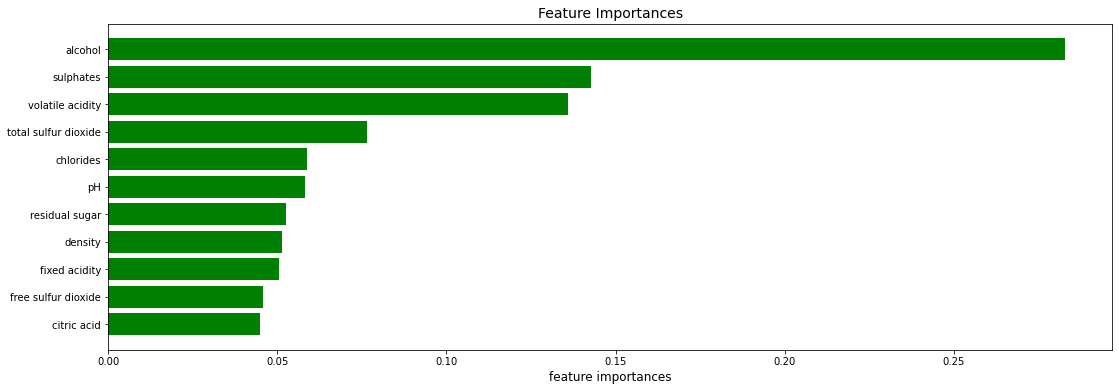

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state =1, max_depth =12)
x = winedf.drop(['quality'],axis=1)
y = winedf['quality']
rf.fit(x,y)
features = winedf.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]

plt.figure(figsize=(18,6))
plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(sorted_index)),importances[sorted_index],color='green')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])
plt.xlabel('feature importances',fontsize = 12)
plt.show()

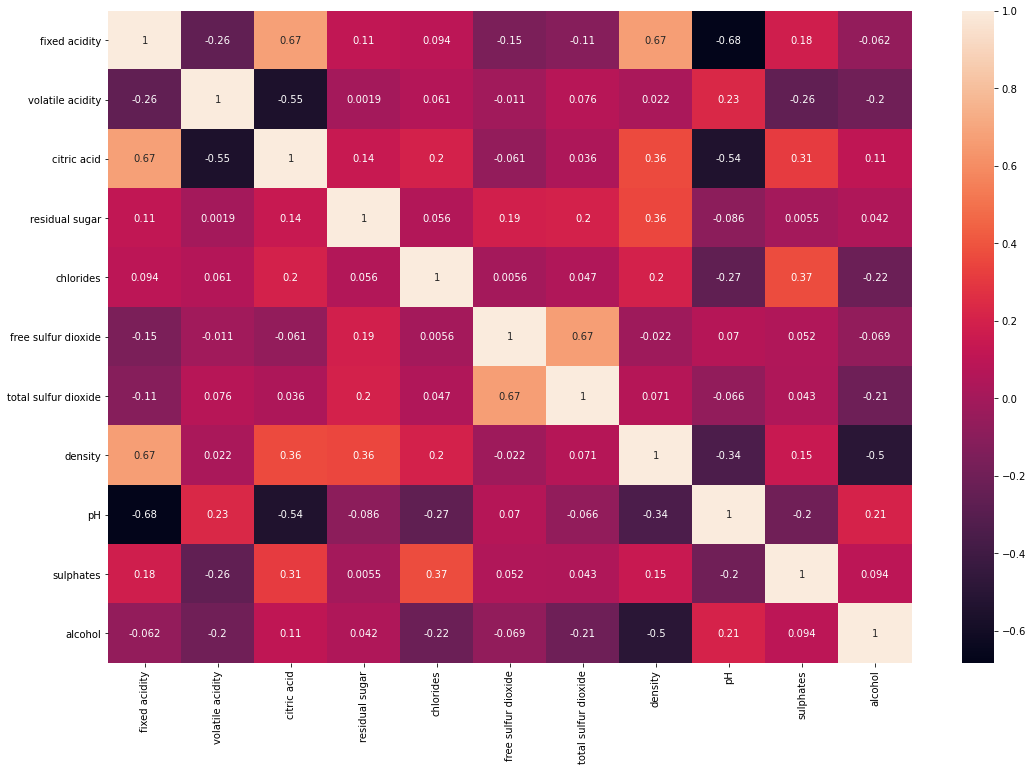

In [30]:
# check for multicollinearity
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [31]:
## Handling Imbalanced Dataset

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto')
x_sm,y_sm = smote.fit_resample(x,y)

In [49]:
y_sm.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [45]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.598369,0.476982,-1.357629,-0.580842,-0.298031,-0.251349,-0.088106,0.667278,1.189622,-0.627742,-1.121780
1,-0.354524,1.212614,-1.357629,-0.006371,0.193489,1.190673,1.082222,0.134941,-0.826355,0.141081,-0.781072
2,-0.354524,0.722193,-1.159677,-0.252573,0.059438,0.160657,0.621184,0.241409,-0.436166,-0.051125,-0.781072
3,1.718159,-1.239492,1.413711,-0.580842,-0.320372,0.366660,0.833970,0.773745,-1.086481,-0.499605,-0.781072
4,-0.598369,0.476982,-1.357629,-0.580842,-0.298031,-0.251349,-0.088106,0.667278,1.189622,-0.627742,-1.121780
...,...,...,...,...,...,...,...,...,...,...,...
4081,-0.035372,-0.453858,0.632381,-0.018922,-0.272797,-0.618520,-0.691003,-1.625209,-0.918165,0.759157,1.693064
4082,-0.972968,-0.900841,0.360259,-0.528081,-0.471998,1.418652,0.783273,-2.045797,0.836788,0.273823,2.127186
4083,-0.655837,-0.874018,0.150343,-0.585544,-0.532268,0.269561,-0.359170,-1.121471,-0.596882,0.450410,0.541610
4084,-1.967921,-0.579562,-0.488765,-0.549133,-0.765174,0.857080,0.881917,-2.726968,2.116333,0.682748,2.796357


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size =0.2,random_state=42)

In [47]:
import  tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [52]:
##
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [53]:
y_train

array([0, 1, 1, ..., 2, 5, 4], dtype=int64)

In [58]:
y_train =pd.DataFrame(y_train.reshape(len(y_train),1))
y_test =pd.DataFrame(y_test.reshape(len(y_test),1))

In [59]:
y_train

,0
0,0
1,1
2,1
3,0
4,2
...,...
3263,3
3264,3
3265,2
3266,5


In [60]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [61]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [62]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [63]:
model.fit(x_train,y_train,epochs=400,verbose = 1)

Epoch 1/400
103/103 [==============================] - 6s 2ms/step - loss: 1.6560 - accuracy: 0.2940
Epoch 2/400
103/103 [==============================] - 0s 2ms/step - loss: 1.1204 - accuracy: 0.5263
Epoch 3/400
103/103 [==============================] - 0s 2ms/step - loss: 1.0167 - accuracy: 0.5776
Epoch 4/400
103/103 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.6063
Epoch 5/400
103/103 [==============================] - 0s 1ms/step - loss: 0.8870 - accuracy: 0.6534
Epoch 6/400
103/103 [==============================] - 0s 1ms/step - loss: 0.8460 - accuracy: 0.6654
Epoch 7/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7983 - accuracy: 0.6763
Epoch 8/400
103/103 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.6862
Epoch 9/400
103/103 [==============================] - 0s 1ms/step - loss: 0.7240 - accuracy: 0.7168
Epoch 10/400
103/103 [==============================] - 0s 1ms/step - loss: 0.7341 - accura

103/103 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8635
Epoch 82/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8734
Epoch 83/400
103/103 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8634
Epoch 84/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8827
Epoch 85/400
103/103 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8722
Epoch 86/400
103/103 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8677
Epoch 87/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2925 - accuracy: 0.8903
Epoch 88/400
103/103 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8983
Epoch 89/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8878
Epoch 90/400
103/103 [==============================]

103/103 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9052
Epoch 161/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.8943
Epoch 162/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9129
Epoch 163/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.8996
Epoch 164/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9131
Epoch 165/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.9081
Epoch 166/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9014
Epoch 167/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9137
Epoch 168/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2165 - accuracy: 0.9095
Epoch 169/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2307 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9228
Epoch 240/400
103/103 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9153
Epoch 241/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9344
Epoch 242/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9269
Epoch 243/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9233: 0s - loss: 0.1934 - accuracy: 0.
Epoch 244/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.9290
Epoch 245/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9325
Epoch 246/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9306
Epoch 247/400
103/103 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9175
Epoch 248/400
103/103 [==============================

Epoch 318/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9299
Epoch 319/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9365
Epoch 320/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9339
Epoch 321/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9311
Epoch 322/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9247
Epoch 323/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9364
Epoch 324/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9342
Epoch 325/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9330
Epoch 326/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9337
Epoch 327/400
103/103 [==============================] - 0s 1ms/step - lo

103/103 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9319
Epoch 398/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9338
Epoch 399/400
103/103 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9349
Epoch 400/400
103/103 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9450


In [64]:
model.fit(x_train,y_train,epochs=500,verbose = 1)

Epoch 1/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9434
Epoch 2/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9443
Epoch 3/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9370
Epoch 4/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9354
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9308
Epoch 6/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9422
Epoch 7/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9431
Epoch 8/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1483 - accuracy: 0.9446
Epoch 9/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9373
Epoch 10/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1771 - accura

103/103 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9474
Epoch 82/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9425
Epoch 83/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9422
Epoch 84/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9394
Epoch 85/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9419
Epoch 86/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9373
Epoch 87/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.9388
Epoch 88/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9419
Epoch 89/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9465
Epoch 90/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 

103/103 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9569
Epoch 161/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9471
Epoch 162/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9489
Epoch 163/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.9510
Epoch 164/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9465
Epoch 165/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9461
Epoch 166/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9547
Epoch 167/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9498
Epoch 168/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9455
Epoch 169/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1312 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9443
Epoch 240/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9492
Epoch 241/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9510
Epoch 242/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9559
Epoch 243/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.9575
Epoch 244/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9513
Epoch 245/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1375 - accuracy: 0.9489
Epoch 246/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1380 - accuracy: 0.9495
Epoch 247/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9532
Epoch 248/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1401 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9587
Epoch 319/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9550
Epoch 320/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9544
Epoch 321/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1368 - accuracy: 0.9434
Epoch 322/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9556
Epoch 323/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9562
Epoch 324/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9559
Epoch 325/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9513
Epoch 326/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9477
Epoch 327/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1145 - a

103/103 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9562
Epoch 398/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9510
Epoch 399/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.9523
Epoch 400/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9486
Epoch 401/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9590
Epoch 402/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9562
Epoch 403/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9565
Epoch 404/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9569
Epoch 405/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.9547
Epoch 406/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1197 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9581
Epoch 477/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9526
Epoch 478/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9559
Epoch 479/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9547
Epoch 480/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9627
Epoch 481/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9544
Epoch 482/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9569
Epoch 483/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9474
Epoch 484/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9507
Epoch 485/500
103/103 [==============================] - 0s 1ms/step - loss: 0.1311 - a

In [65]:
y_pred = model.predict_classes(x_test)

In [66]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [68]:
y_test = np.argmax(y_test,axis=1)

In [69]:
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [67]:
y_pred

array([2, 2, 4, 4, 1, 1, 3, 2, 2, 2, 5, 4, 2, 0, 5, 2, 2, 2, 5, 1, 3, 0,
       2, 2, 1, 0, 3, 0, 3, 5, 2, 0, 4, 3, 0, 3, 2, 5, 1, 4, 5, 4, 2, 4,
       4, 1, 4, 1, 1, 5, 3, 3, 2, 3, 4, 0, 1, 4, 1, 3, 4, 1, 3, 0, 5, 1,
       0, 4, 4, 2, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 1, 3, 3, 3, 5, 5, 1, 5, 1, 2, 2, 1, 3, 0, 4, 4,
       3, 1, 4, 1, 2, 1, 0, 5, 1, 2, 2, 3, 4, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 3, 3, 0, 4, 2, 1, 2, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 2, 1, 1, 3, 5, 5, 4, 4, 2, 4, 2, 4, 4, 2, 3, 4, 2, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 3, 2, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 2, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 3, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 2, 3, 3, 0, 3, 3, 4, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 3, 4, 0, 0, 2, 4, 1, 2,

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       0.93      0.97      0.95       131
           2       0.68      0.75      0.71       150
           3       0.73      0.56      0.64       155
           4       0.84      0.94      0.89       116
           5       1.00      0.99      0.99       134

    accuracy                           0.85       818
   macro avg       0.86      0.87      0.86       818
weighted avg       0.85      0.85      0.85       818



In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size =0.2,random_state=42)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [74]:
y_train =pd.DataFrame(y_train.reshape(len(y_train),1))
y_test =pd.DataFrame(y_test.reshape(len(y_test),1))

In [75]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [76]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(256,activation='relu'))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [77]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [78]:
model.fit(x_train,y_train,epochs=500,verbose = 1)

Epoch 1/500
103/103 [==============================] - 1s 2ms/step - loss: 1.5242 - accuracy: 0.3557
Epoch 2/500
103/103 [==============================] - 0s 2ms/step - loss: 1.1150 - accuracy: 0.5334
Epoch 3/500
103/103 [==============================] - 0s 2ms/step - loss: 0.9773 - accuracy: 0.5810
Epoch 4/500
103/103 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.6185
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 0.8775 - accuracy: 0.6324
Epoch 6/500
103/103 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.6598: 0s - loss: 0.8196 - accuracy: 
Epoch 7/500
103/103 [==============================] - 0s 2ms/step - loss: 0.7634 - accuracy: 0.6954
Epoch 8/500
103/103 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.7200
Epoch 9/500
103/103 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.7181
Epoch 10/500
103/103 [==============================] - 0s 

103/103 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8612
Epoch 82/500
103/103 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8766
Epoch 83/500
103/103 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8813
Epoch 84/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8831
Epoch 85/500
103/103 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8762
Epoch 86/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.8817
Epoch 87/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8847
Epoch 88/500
103/103 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8784
Epoch 89/500
103/103 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8725
Epoch 90/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 

103/103 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9154
Epoch 161/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9135
Epoch 162/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9096
Epoch 163/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9158
Epoch 164/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8843
Epoch 165/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9120
Epoch 166/500
103/103 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.9008
Epoch 167/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9129
Epoch 168/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9132
Epoch 169/500
103/103 [==============================] - 0s 1ms/step - loss: 0.2153 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9291
Epoch 240/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9194
Epoch 241/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9227
Epoch 242/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9358
Epoch 243/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9254
Epoch 244/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9210
Epoch 245/500
103/103 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9171
Epoch 246/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9268
Epoch 247/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9229
Epoch 248/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1941 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9291
Epoch 319/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9258
Epoch 320/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9270
Epoch 321/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9304
Epoch 322/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9308
Epoch 323/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9366
Epoch 324/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9401
Epoch 325/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9334
Epoch 326/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9316
Epoch 327/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1851 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9332
Epoch 398/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9373
Epoch 399/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9342
Epoch 400/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9375
Epoch 401/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9493
Epoch 402/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9408
Epoch 403/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9460
Epoch 404/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9467
Epoch 405/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9418
Epoch 406/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1588 - a

103/103 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9442
Epoch 477/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9357
Epoch 478/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9504
Epoch 479/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9463
Epoch 480/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9365
Epoch 481/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9503
Epoch 482/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.9387
Epoch 483/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9393
Epoch 484/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9333
Epoch 485/500
103/103 [==============================] - 0s 2ms/step - loss: 0.1482 - a

In [79]:
y_pred = model.predict_classes(x_test)

In [80]:
y_test = np.argmax(y_test,axis=1)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       0.91      0.98      0.95       131
           2       0.69      0.69      0.69       150
           3       0.71      0.57      0.63       155
           4       0.86      0.93      0.90       116
           5       0.94      1.00      0.97       134

    accuracy                           0.85       818
   macro avg       0.85      0.86      0.85       818
weighted avg       0.84      0.85      0.84       818

